Data Dictionary
Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'


| Variable   |      Description      |
|------------|-------------:|
|Loan_ID	| Unique Loan ID|
|Gender	|Male/ Female|
|Married	|Applicant married (Y/N)|
|Dependents	|Number of dependents|
|Education	|Applicant Education (Graduate/ Under Graduate)|
|Self_Employed	|Self employed (Y/N)|
|ApplicantIncome	|Applicant income|
|CoapplicantIncome	|Coapplicant income|
|LoanAmount	|Loan amount in thousands|
|Loan_Amount_Term	|Term of loan in months|
|Credit_History	|credit history meets guidelines|
|Property_Area	|Urban/ Semi Urban/ Rural|
|Loan_Status	|(Target) Loan approved (Y/N)|


Test file: CSV containing the customer information for whom loan eligibility is to be predicted

| Variable   |      Description      |
|------------|-------------:|
|Loan_ID	|Unique Loan ID|
|Gender	|Male/ Female|
|Married	|Applicant married (Y/N)|
|Dependents	|Number of dependents|
|Education	|Applicant Education (Graduate/ Under Graduate)|
|Self_Employed	|Self employed (Y/N)|
|ApplicantIncome	|Applicant income|
|CoapplicantIncome	|Coapplicant income|
|LoanAmount	|Loan amount in thousands|
|Loan_Amount_Term	|Term of loan in months|
|Credit_History	|credit history meets guidelines|
|Property_Area	|Urban/ Semi Urban/ Rural|


Submission file format

| Variable   |      Description      |
|------------|-------------:|
|Loan_ID	 |Unique Loan ID|
|Loan_Status |	(Target) Loan approved (Y/N)|


In [43]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# One Hot Encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# valores_numericos = label_encoder.fit_transform(cor)

In [11]:
# Add path to data files
data_files = 'data/'
csv_name = 'train_ctrUa4K.csv'

In [44]:
# My functions
def verifica_na(dataset):
    for i in dataset.columns:
        tamanho = dataset[i].shape[0]
        vazio = dataset[i].isna().sum()
        percent = (vazio / tamanho) * 100
        if  vazio > 0:
            print('A Coluna : {} tem  {:.8f} % de dados faltantes,sendo {} dados faltantes do total {}'.format(i,percent,vazio,tamanho))
        else:
            print('Sem dados Faltantes ')


            
def missing_values(dataset):
    '''
        Retorna o nome das colunas com dados faltantes
    '''
    colunas = []
    for i in dataset.columns:
        if dataset[i].isna().sum() > 0 :
            colunas.append(i)
    return colunas


def information(dataset):
    ''' 
        Return a new dataset with columns :
        - columns ( columns in original dataset )
        - types (data types in your dataset)
        - size ( size of your dataset)
        - unique ( data unique in your dataset)
        - missing data percent ( Percent of data missing in your dataset )
    '''
    df_aux = pd.DataFrame({'columns':dataset.columns,
    'types': dataset.dtypes,
    'missing':dataset.isna().sum(),
    'size':dataset.shape[0],
    'unique':dataset.nunique()})
    df_aux['missing data percent'] = round(df_aux['missing']/df_aux['size'],2)
    return df_aux    

# One Hot Encoding : transformar valores catégoricos em valores numéricos

In [30]:
# Train Data
train = pd.read_csv('../data/train_ctrUa4K.csv')

In [14]:
train.shape

(614, 13)

In [42]:
# Information about dataset
information(train)

,columns,types,missing,size,unique,missing data percent
Loan_ID,Loan_ID,object,0,614,614,0.00
Gender,Gender,object,13,614,2,0.02
Married,Married,object,3,614,2,0.00
Dependents,Dependents,object,15,614,4,0.02
Education,Education,object,0,614,2,0.00
Self_Employed,Self_Employed,object,32,614,2,0.05
ApplicantIncome,ApplicantIncome,int64,0,614,505,0.00
CoapplicantIncome,CoapplicantIncome,float64,0,614,287,0.00
LoanAmount,LoanAmount,float64,22,614,203,0.04
Loan_Amount_Term,Loan_Amount_Term,float64,14,614,10,0.02


In [28]:
# FEATURES WITH MISSING VALUES
missing_values(train)

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

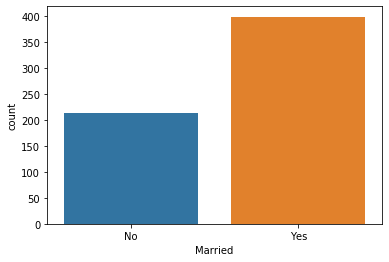

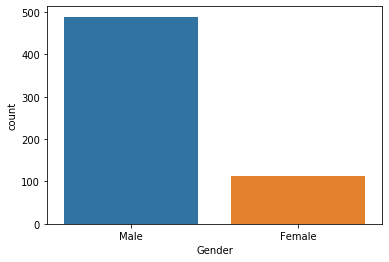

In [48]:
sns.countplot(train.Married)
plt.show()
sns.countplot(train.Gender)
plt.show()

In [53]:
# Loan_Status
valores_numericos = label_encoder.fit(train["Loan_Status"])
###########
# 0 = No
# 1 = Yes

In [60]:
# transform Loan_Status to numeric Feature
train['Loan_Status_X'] = label_encoder.fit_transform(train["Loan_Status"])

In [61]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_X
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [62]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Loan_Status_X         0
dtype: int64

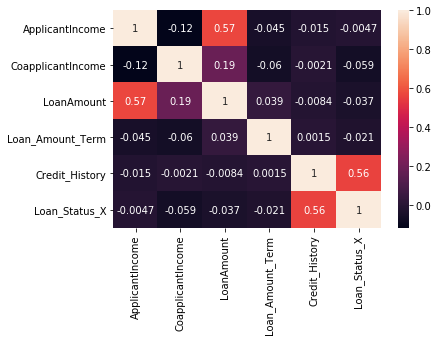

In [63]:
sns.heatmap(train.corr(method='pearson'),annot = True)
plt.show()